<center><div style="font-size : 20px; font-weight : bold; color : darkbue;">LAPORAN TUGAS BESAR</div>
<div>Tubes Tahap-1: Pengelompokan dg k-Means</div>
<hr>
<div>6182001003 | Rivaldi Godjali - 6182001004 | William Surya W</div>

In [54]:
#import library
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

import pickle;

from sklearn.cluster import KMeans;
from sklearn.metrics import silhouette_score;

from sklearn.model_selection import train_test_split;

In [55]:
#load data
mall = pd.read_csv("https://raw.githubusercontent.com/shrk-sh-ioai/tubes-ppdp/main/mall-customer-dt/mall-customers.csv", sep=",", encoding='cp1252');


In [56]:
#checking data - NaN value
dfCheck = mall[mall.isna().any(axis=1)];
print("Data with NaN values :"); print(dfCheck);

Data with NaN values :
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [57]:
#cheking data - Minimum value
print("Minimum values :"); print(mall.min());

Minimum values :
CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object


In [58]:
#checking data - Maximum value
print("Maximum values :"); print(mall.max());

Maximum values :
CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object


In [59]:
#preparing data

# spending score classification ----------
spend_classes = ["1","2","3","4","5","6","7","8","9","10"];

spend_items = pd.IntervalIndex.from_tuples([(0, 11), (11, 21), (21, 31), (31, 41), (41, 51), (51,61), (61,71), (71,81), (81,91), (91,101)], closed='left');

mall['Spending_Class'] = np.array(spend_classes)[
    pd.cut(mall["Spending Score (1-100)"],
    bins = spend_items).cat.codes
];

# gender classification ----------
gender_classes = ['0','1'];

gender_items = [
    (mall['Gender'] == "Female"),
    (mall['Gender'] == "Male"),
];

mall['Gender_Class'] = np.select(gender_items, gender_classes);

# age classification ----------
# 15-24 tahun: Kelompok usia muda
# 25-34 tahun: Kelompok usia pekerja awal
# 35-44 tahun: Kelompok usia paruh baya
# 45-54 tahun: Kelompok usia pra-pensiun
# 55-64 tahun: Kelompok usia pensiun
# 65 tahun ke atas: Kelompok usia lanjut

age_classes = ['0','1','2','3','4','5'];

age_items = [
    (mall['Age'] >= 15) & (mall['Age'] <= 24),
    (mall['Age'] >= 25) & (mall['Age'] <= 34),
    (mall['Age'] >= 35) & (mall['Age'] <= 44),
    (mall['Age'] >= 45) & (mall['Age'] <= 54),
    (mall['Age'] >= 55) & (mall['Age'] <= 64),
    (mall['Age'] >= 65),
];

mall['Age_Class'] = np.select(age_items, age_classes);

print(mall);

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    Spending_Class Gender_Class Age_Class  
0                4            1         0  

In [60]:
# searching best-k ----------
mall_x = mall[[
    'Gender_Class',
    'Age_Class',
    'Annual Income (k$)',
    'Spending_Class'
]];

mall_x_np = np.array(mall_x.values);

print(mall_x);

# kmeans model train ---------
intertia = [];
silhouette_coefficients = [];

k_range = range(2,10);
for k in k_range :
    
    kmeans_model = KMeans(
        n_clusters = k,
        random_state=0
    ).fit(mall_x_np);
    
    intertia.append(kmeans_model.inertia_);
    
    score = silhouette_score(
        mall_x_np,
        kmeans_model.labels_,
        metric='euclidean'
    );
    
    silhouette_coefficients.append(score);

    Gender_Class Age_Class  Annual Income (k$) Spending_Class
0              1         0                  15              4
1              1         0                  15              9
2              0         0                  16              1
3              0         0                  16              8
4              0         1                  17              4
..           ...       ...                 ...            ...
195            0         2                 120              8
196            0         3                 126              3
197            1         1                 126              8
198            1         1                 137              2
199            1         1                 137              9

[200 rows x 4 columns]


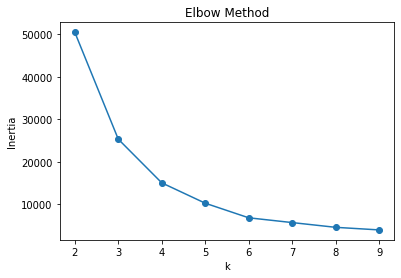

In [61]:
# elbow Method Result Visualization
plt.plot(k_range, intertia, marker= "o");

plt.xlabel('k'); plt.xticks(np.arange(2, 10));
plt.ylabel('Inertia'); plt.title('Elbow Method');

plt.show();

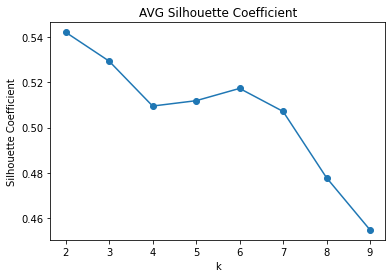

In [62]:
# silhouette Coefficient Result Visualization
plt.plot(k_range, silhouette_coefficients, marker= "o");

plt.xlabel('k'); plt.xticks(np.arange(2, 10));
plt.ylabel("Silhouette Coefficient"); plt.title("AVG Silhouette Coefficient");

plt.show();

In [63]:
# covariant
print(mall.cov());

                         CustomerID         Age  Annual Income (k$)  \
CustomerID              3350.000000  -21.638191         1486.050251   
Age                      -21.638191  195.133166           -4.548744   
Annual Income (k$)      1486.050251   -4.548744          689.835578   
Spending Score (1-100)    20.678392 -118.040201            6.716583   

                        Spending Score (1-100)  
CustomerID                           20.678392  
Age                                -118.040201  
Annual Income (k$)                    6.716583  
Spending Score (1-100)              666.854271  


In [64]:
# model-load
kmeans_model = KMeans(n_clusters=5, random_state=0).fit(mall_x_np);

# save kmeans model
pickle.dump(kmeans_model, open('kmeans_model_mall','wb'));

# load kmeans model
loaded_model = pickle.load(open('kmeans_model_mall','rb'));
mall['class'] = loaded_model.predict(mall_x_np);

print(mall);

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    Spending_Class Gender_Class Age_Class  class  
0                4            1     

In [65]:
# Object Cluster Variable
object_cluster = kmeans_model.labels_;

print(object_cluster);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [66]:
# Object Centroids
centroids = kmeans_model.cluster_centers_;

print(centroids);

[[  0.4375       1.5625      22.           5.46875   ]
 [  0.53571429   1.69642857  78.89285714   5.41071429]
 [  0.44         2.26        60.44         5.46      ]
 [  0.35         1.7        109.7          5.6       ]
 [  0.35714286   2.30952381  42.23809524   5.54761905]]
